You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link: https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?usp=sharing

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

Q1. Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
diabetes_df = pd.read_csv('diabetes.csv')

In [3]:
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Exploratory Data Analysis (EDA)

In [4]:
## check how many values we have in our dataset
diabetes_df.shape

(768, 9)

In [5]:
## variables in dataset
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
## Information about the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


All features are in numerical format.

In [7]:
## To know more about the dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Observations: 
1. All our features are numerical
2. We have a total sample size of 768
3. There are no missing values to deal with right now
4. A few features have a minimum value of 0 which is suspicious for (living) humans:
- Min glucose = 0
- Min blood pressure = 0
- Min skin thickness = 0
- Min insulin = 0
- Min BMI = 0
5. To clean this up, we will convert these zeros to nulls and remove them from our dataset. This takes our dataset down from 768 to 392 

In [8]:
columns_to_replace = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes_df[columns_to_replace] = diabetes_df[columns_to_replace].replace(0, np.nan)

In [9]:
diabetes_df.dropna(inplace=True)
diabetes_df.reset_index(drop=True, inplace=True)

In [10]:
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.301020,122.627551,70.663265,29.145408,156.056122,33.086224,0.523046,30.864796,0.331633
std,3.211424,30.860781,12.496092,10.516424,118.841690,7.027659,0.345488,10.200777,0.471401
min,0.000000,56.000000,24.000000,7.000000,14.000000,18.200000,0.085000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,21.000000,76.750000,28.400000,0.269750,23.000000,0.000000
50%,2.000000,119.000000,70.000000,29.000000,125.500000,33.200000,0.449500,27.000000,0.000000
75%,5.000000,143.000000,78.000000,37.000000,190.000000,37.100000,0.687000,36.000000,1.000000
max,17.000000,198.000000,110.000000,63.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Data Visualization

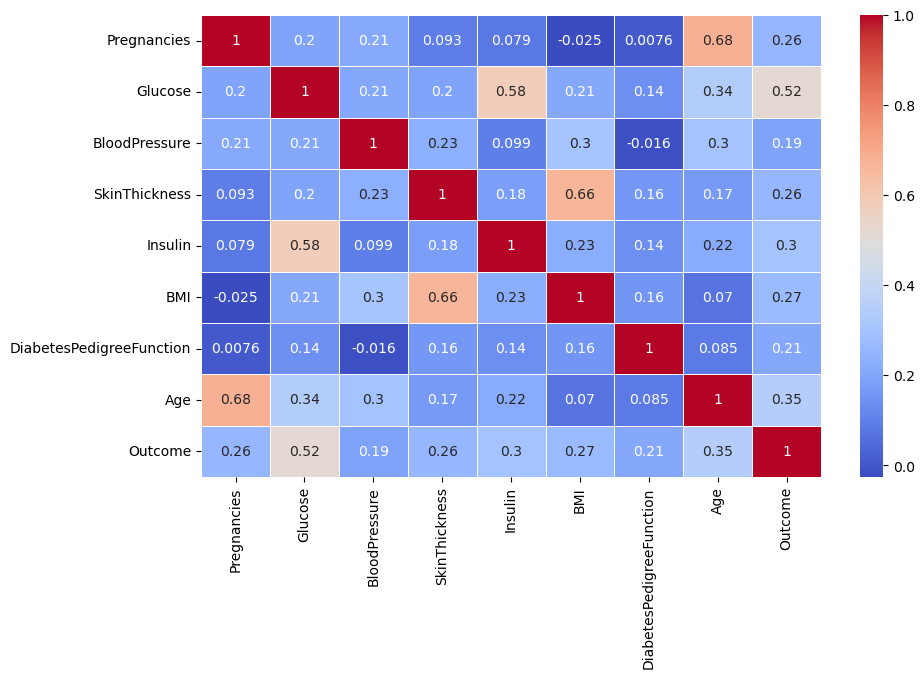

In [11]:
# Correlation matrix heatmap
correlation_matrix = diabetes_df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.show()

## Observations
1. The outcome is positively correlated with all features which is a good sign for modelling
2. The outcome is most strongly correlated with Glucose (which makes sense since this is about Diabetes) and then Age
3. There is a strong correlation between Age and Pregnancies – older women = more pregnancies
4. Insulin and Glucose are correlated – higher insulin = higher glucose
5. SkinThickness and BMI are correlated – higher BMI = higher skin thickness

0    262
1    130
Name: Outcome, dtype: int64


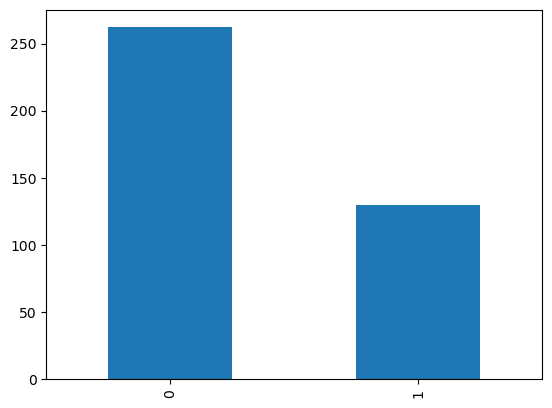

In [12]:
## let’s check that how well our outcome column is balanced
color_wheel = {1: "#0392cf", 2: "#7bc043"}
colors = diabetes_df["Outcome"].map(lambda x: color_wheel.get(x + 1))
print(diabetes_df.Outcome.value_counts())
p=diabetes_df.Outcome.value_counts().plot(kind="bar")

Inference: Here from the above visualization it is clearly visible that our dataset is completely imbalanced in fact the number of patients who are diabetic is half of the patients who are non-diabetic.

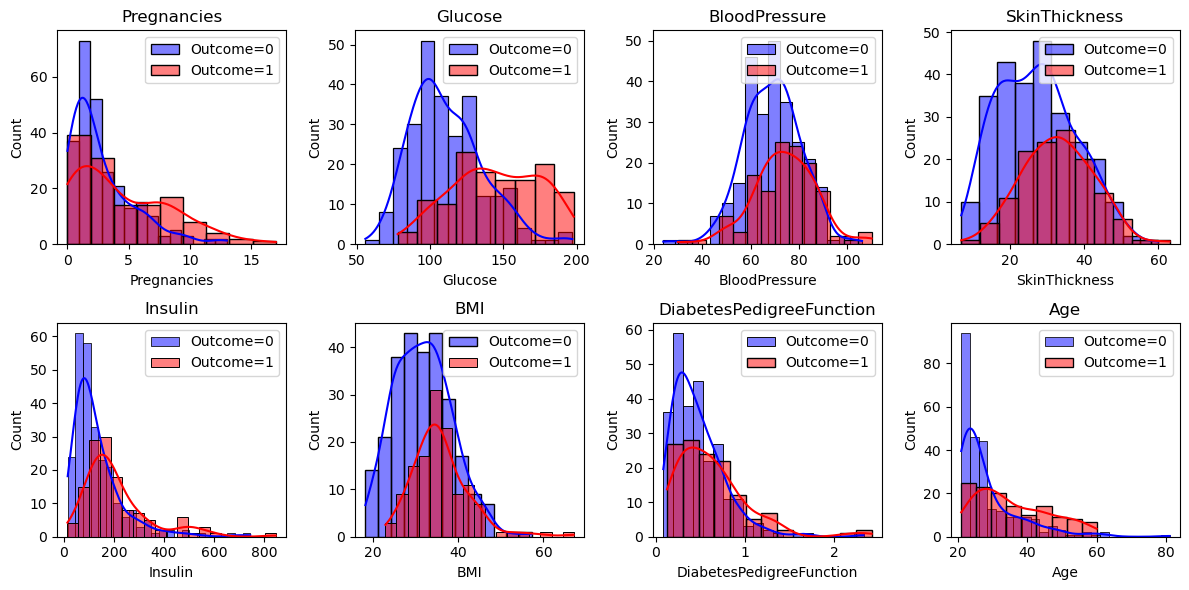

In [13]:
# Distribution of variables by outcome
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]
plt.figure(figsize=(12, 6))
for i, column in enumerate(column_names[:-1]):
    plt.subplot(2, 4, i+1)
    sns.histplot(diabetes_df[diabetes_df['Outcome'] == 0][column], label='Outcome=0', color='blue', kde=True)
    sns.histplot(diabetes_df[diabetes_df['Outcome'] == 1][column], label='Outcome=1', color='red', kde=True)
    plt.legend()
    plt.title(column)
plt.tight_layout()
plt.show()

Q2. Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

In [14]:
# Check for missing values
missing_values = diabetes_df.isnull().sum()
print(missing_values)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


There are no missing values.

In [15]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               392 non-null    int64  
 1   Glucose                   392 non-null    float64
 2   BloodPressure             392 non-null    float64
 3   SkinThickness             392 non-null    float64
 4   Insulin                   392 non-null    float64
 5   BMI                       392 non-null    float64
 6   DiabetesPedigreeFunction  392 non-null    float64
 7   Age                       392 non-null    int64  
 8   Outcome                   392 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 27.7 KB


There are no categorical values.

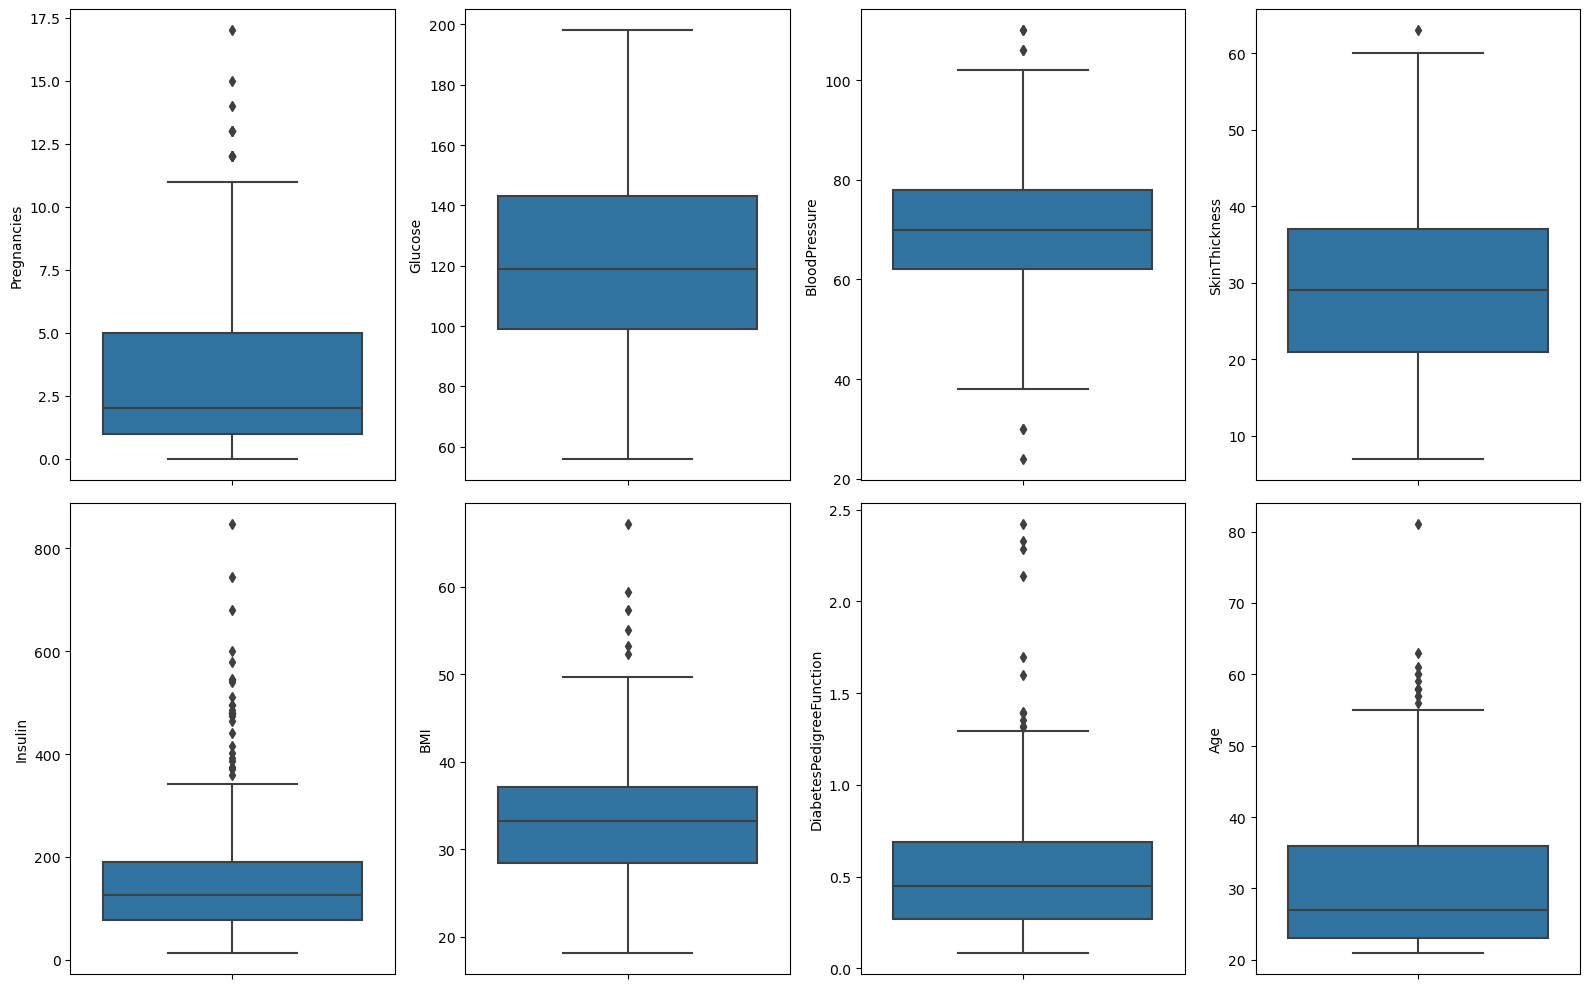

In [16]:
## Visualize Outliers
plt.figure(figsize=(16,10))

features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

for i,col in enumerate(features):    
    plt.subplot(2,4,i + 1)
    sns.boxplot(y=col, data=diabetes_df)

plt.tight_layout()

plt.show()

Except for Glucose, all other features have a considerable share of outliers.

In [17]:
## To remove outliers from specific columns in the dataset
columns_to_remove_outliers = ['Pregnancies', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']

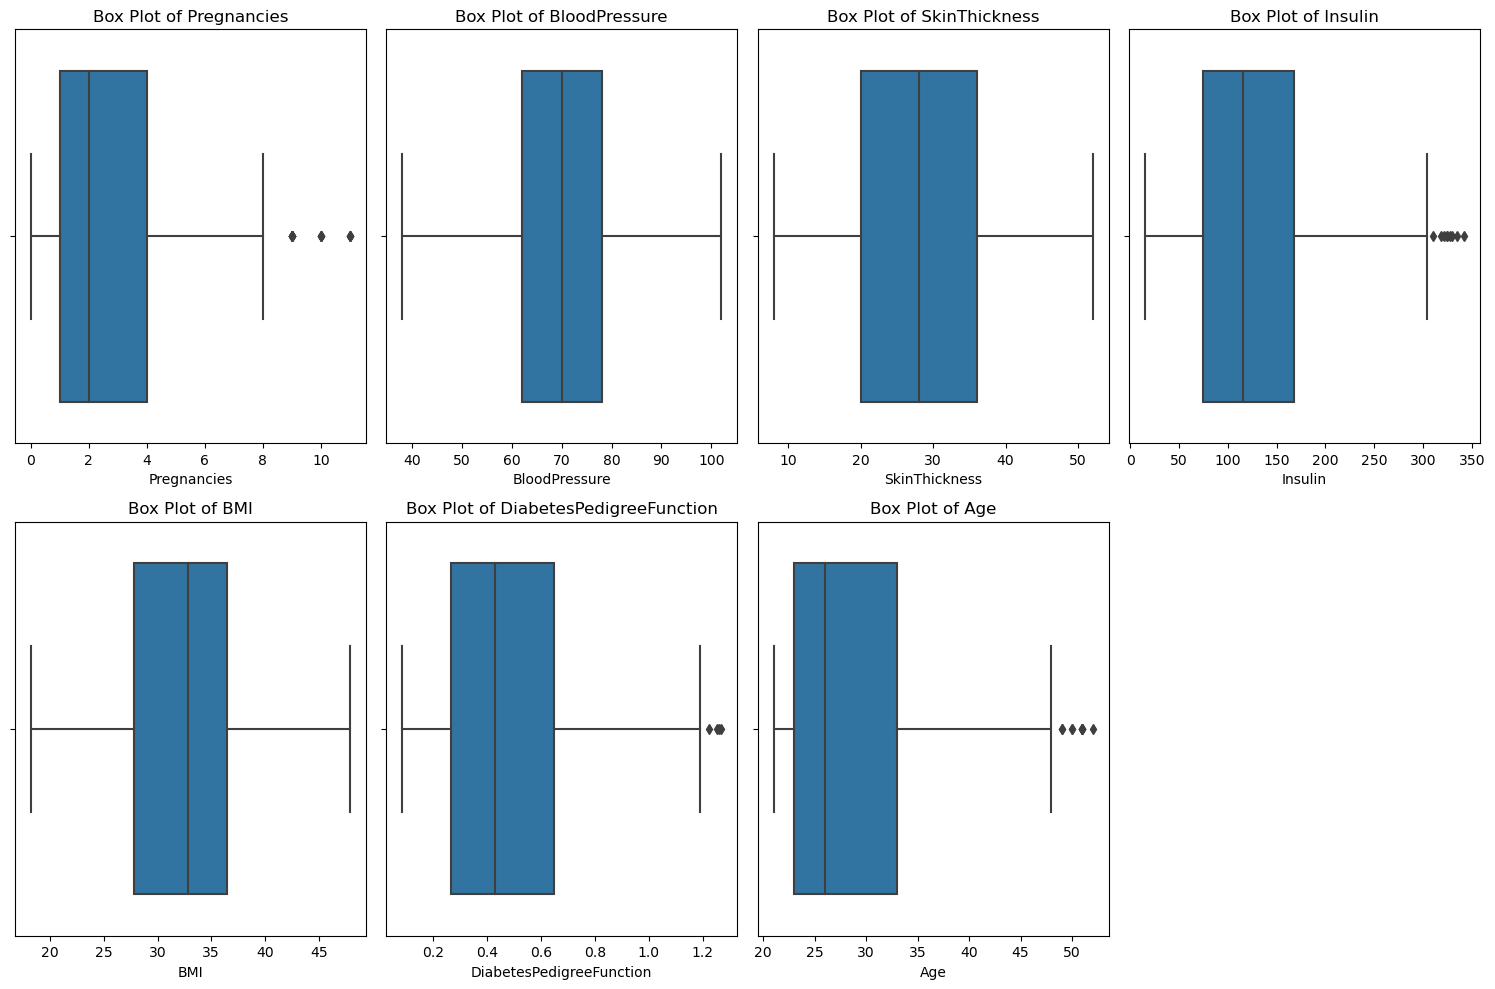

In [18]:
# Define a function to remove outliers using the IQR method
def remove_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return data

# Remove outliers from the specified columns
for column in columns_to_remove_outliers:
    diabetes_df = remove_outliers(diabetes_df, column)

# Visualize box plots again after outlier removal
plt.figure(figsize=(15, 10))
for i, column in enumerate(columns_to_remove_outliers):
    plt.subplot(2, 4, i + 1)
    sns.boxplot(x=diabetes_df[column])
    plt.title(f"Box Plot of {column}")
plt.tight_layout()
plt.show()

We have removed outliers to certain limit whic are much lower than before.

Q3. Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

In [19]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = diabetes_df.drop(columns=['Outcome'])  # Features
y = diabetes_df['Outcome']  # Target variable

# Set a random seed for reproducibility
random_seed = 42

# Split the dataset into a training set (80%) and a test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=random_seed)

# Print the sizes of the training and test sets
print(f"Training set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Training set size: 256 samples
Test set size: 65 samples


In [20]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((256, 8), (65, 8), (256,), (65,))

Q4. Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

In [21]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Create a DecisionTreeClassifier
tree_classifier = DecisionTreeClassifier(random_state=42)

# Fit the decision tree model
tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [23]:
# Define hyperparameters to tune
parameter = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'splitter' : ['best', 'random'],
    'max_depth': [None, 10, 20, 30],  # Max depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum samples required to split a node
    'min_samples_leaf': [1, 2, 4],   # Minimum samples required at a leaf node
    'max_features' : ['auto', 'sqrt', 'log2']
}

# Create a GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(tree_classifier, param_grid=parameter, cv=5, scoring='accuracy')

# Fit the model to the training data and perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}


In [24]:
# Train the decision tree classifier with the best hyperparameters
best_tree_classifier = DecisionTreeClassifier(random_state=42, **best_params)
best_tree_classifier.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, max_features='auto', min_samples_split=10,
                       random_state=42, splitter='random')

Q5. Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score

# Predict on the test set
y_pred = best_tree_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Calculate precision
precision = precision_score(y_test, y_pred)
print("Precision:", precision)

# Calculate recall
recall = recall_score(y_test, y_pred)
print("Recall:", recall)

# Calculate F1 score
f1 = f1_score(y_test, y_pred)
print("F1 Score:", f1)

Accuracy: 0.7230769230769231
Precision: 0.6666666666666666
Recall: 0.36363636363636365
F1 Score: 0.4705882352941177


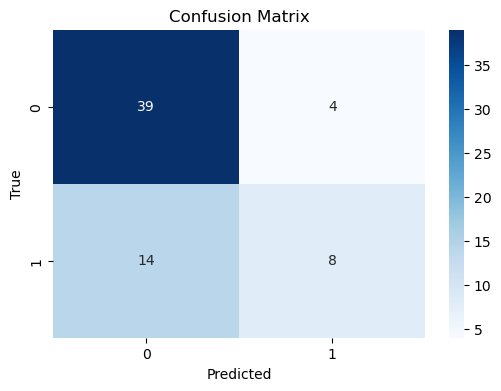

In [26]:
# Generate and plot a confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

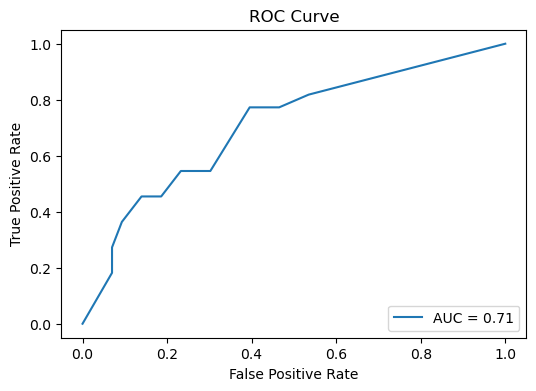

In [27]:
# Generate and plot an ROC curve
y_prob = best_tree_classifier.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

Q6. Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

In [31]:
# Extract feature importances
feature_importances = best_tree_classifier.feature_importances_

# Create a DataFrame to display feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Print feature importances
print("Feature Importances:")
print(importance_df)

Feature Importances:
                    Feature  Importance
1                   Glucose    0.490630
0               Pregnancies    0.255350
7                       Age    0.123062
5                       BMI    0.062076
2             BloodPressure    0.037573
3             SkinThickness    0.019599
6  DiabetesPedigreeFunction    0.010709
4                   Insulin    0.001002


<AxesSubplot: >

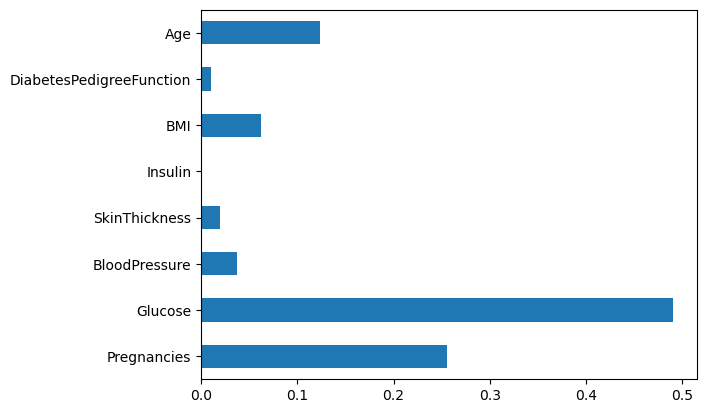

In [35]:
## Plotting feature importances
(pd.Series(best_tree_classifier.feature_importances_, index=X.columns).plot(kind='barh'))

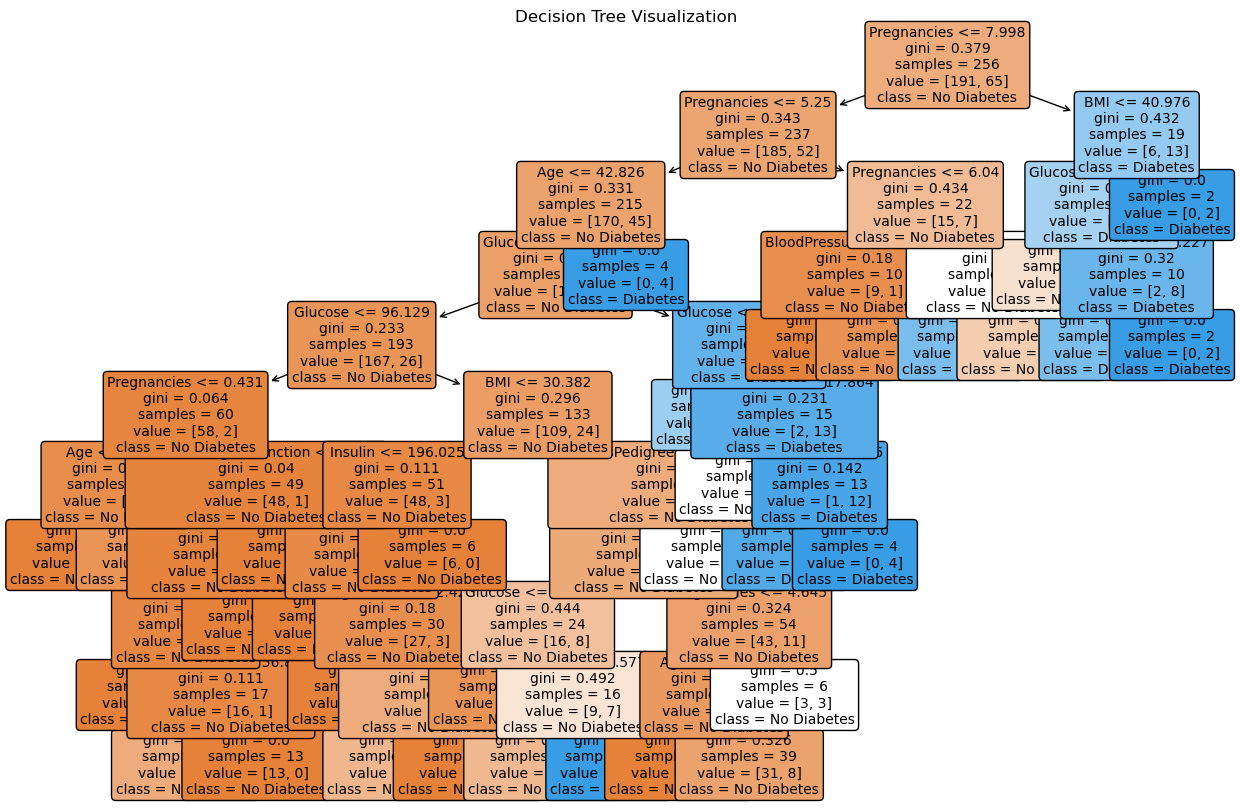

In [34]:
from sklearn.tree import plot_tree

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(best_tree_classifier, 
          feature_names=X.columns,
          class_names=["No Diabetes", "Diabetes"],
          filled=True, 
          rounded=True, 
          fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()

## Interpretation
- The tree has a maximum depth of 10, meaning it can make decisions based on up to 10 features or conditions.
- The 'gini' criterion is used to measure impurity in each split.
- 10 is the minimum number of samples required to split an internal node.
- 1 is the minimum number of sample required to be in a leaf node.

- The most important feature for predicting diabetes is "Glucose," which is expected given its strong association with diabetes.
- "Pregnancies" and "Age" are also significant factors, suggesting that the number of pregnancies and age contribute to diabetes risk.
- "BMI" and "Blood Pressure" are moderately important, indicating that body mass index and blood pressure play a role.
- The model uses these features and thresholds to make splits and predict diabetes.

Q7. Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.
By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!

In [45]:
# Sample new data
new_data = pd.DataFrame({
    'Pregnancies': [9],
    'Glucose': [170],
    'BloodPressure': [74],
    'SkinThickness': [31],
    'Insulin': [0],
    'BMI': [44],
    'DiabetesPedigreeFunction': [0.403],
    'Age': [43]
})
new_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,9,170,74,31,0,44,0.403,43


To validate the decision tree model on the provided new_data and assess its robustness, we will:
1. Apply the Model to new_data.
2. Perform Sensitivity Analysis: Perturb one feature (Glucose) and observe the model's response.
3. Perform Scenario Testing: Simulate a scenario by modifying a feature (Age) and evaluate the model's response.

In [48]:
# Step 1: Apply the Model to new_data
new_predictions = best_tree_classifier.predict(new_data)

# Step 2: Sensitivity Analysis (Perturbing Glucose)
perturbed_data = new_data.copy()
perturbed_data['Glucose'] += 10  # Perturb Glucose feature by +10
sensitivity_predictions = best_tree_classifier.predict(perturbed_data)

# Step 3: Scenario Testing (Increased Age)
scenario_data = new_data.copy()
scenario_data['Age'] += 10  # Simulate an increase in Age
scenario_predictions = best_tree_classifier.predict(scenario_data)

# Display the results
print("Predictions for new_data:", new_predictions)
print("Predictions for Perturbed Glucose:", sensitivity_predictions)
print("Predictions for Increased Age:", scenario_predictions)

Predictions for new_data: [1]
Predictions for Perturbed Glucose: [1]
Predictions for Increased Age: [1]


- The model consistently predicts that the person in new_data is diabetic, even when Glucose is perturbed and Age is increased. These results indicate that the model's predictions are robust to variations in Glucose levels and Age, at least based on the provided data and model.